# Group 5: Movie Recommender Challenge: Unsupervised Learning - EDSA

@ Team 5

<div align="center" style="width: 800px; font-size: 100%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/drikus-d/unsupervised-predict-streamlit-template/master/DataSets/reccomnd%20pic.jpg"

</div>

## Table of Contents

1. <a href ="#1.-Challenge">Challenge Description</a>
2. <a href ="#2.-Evaluation-Metric">Evaluation Metric</a>
3. <a href ="#3.-Comet-Experiment">Comet Experiment</a>
4. <a href ="#4.-Importing-Libraries">Importing Libraries</a>
5. <a href ="#5.- Reading the Datasets"> Reading the Datasets</a>
6. <a href ="#6.-Data Description & Summary Statistics">Data Description & Summary Statistics</a>
7. <a href ="#7.-Exploratory-Data-Analysis"> Exploratory Data Analysis</a>
8. <a href ="#8.-Content-Based-Filtering">Recommendation System</a>
9. <a href ="#9.-Collaborative-Filtering">Collaborative Filtering</a>
10. <a href ="#11.-Data Engineering - Trim Data">Data Engineering - Trim Data</a>
11. <a href ="#11.-The Chosen Model Summary and Conclusion">The Chosen Model Summary</a>
12. <a href ="#12.-Submission">Submission</a>
13. <a href ="#12.-Pickle file generation">Pickle File Generation</a>  


## 1. Challenge

## Description:
<p align="justify" > 
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

<p align="justify" > With this context, EDSA is challenging US to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

<p align="justify" > Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

## Problem Statement:
<p align="justify" > Develop an unsupervised machine learning model that can accurately predict how a user would rate a movie they haven't seen based on their previous browsing history and/or content or collaborative filtering.

##**<font color='purple'>Task:</font>**
<p align="justify" > To construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.


## 2. Evaluation Metric

<p align="justify" > The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms, the the formula is given by:

![RMSE.PNG](https://github.com/drikus-d/unsupervised-predict-streamlit-template/blob/main/resources/imgs/RMSE.png?raw=1)

<p align="justify" > Where R is the total number of recommendations generated for users and movies, with ${r_{ui}}$ and ${r-hat_{ui}}$ being the true, and predicted ratings for user u watching movie i, respectively.

## 3. Comet Experiment Initialisation

In [5]:
!pip install comet_ml

     |████████████████████████████████| 315 kB 948 kB/s eta 0:00:01
     |████████████████████████████████| 418 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 908 kB/s eta 0:00:01
  Created wheel for dulwich: filename=dulwich-0.20.32-cp39-cp39-macosx_10_9_x86_64.whl size=479366 sha256=0809447589048aaf9504c1d3a8e37e04c28f729e682ecf6104a6dbe07963ce5b
  Stored in directory: /Users/MamaAmakah/Library/Caches/pip/wheels/65/26/d7/270580db75fec643af7355b97dacd662137886d7223fd5d533
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=666cb0c51fd3cb04897e7c6c611658df9597754de2423513f00e2efbabf0747b
  Stored in directory: /Users/MamaAmakah/Library/Caches/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=74cdb73744eed94a223b31dca4126833c38f64fbddc8230f

In [6]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="1DpubPFI6szNQR3Dou0CiLiDC",
    project_name="recommender",
    workspace="drikus-d",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/drikus-d/recommender/25b3293047514f3aa20abdd3ac3f1e9a



## 4. Importing Libraries

Import supporting python libraries to help construct our recommendation model.

In [19]:
!pip install scikit-surprise

In [7]:
# Install packages here

# Package we need fore Comet
from comet_ml import Experiment

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Package for timing code
import timeit


# Packages for visualization
import matplotlib
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")


# Packages for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## 5. Reading the Datasets

In [23]:
#import os
#os.chdir('C:/Users/Drikus/OneDrive/Documents/EXPLORE Coursework/Unsupervised/PredictData')

In [8]:
movies_df = pd.read_csv('movies.csv') 
imdb_df = pd.read_csv('imdb_data.csv')
genome_score = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tags_df = pd.read_csv('tags.csv')
links_df = pd.read_csv('links.csv')
sample_submission_df = pd.read_csv('sample_submission.csv') 

#### Kaggle 
<p align="justify" > The aim of the Kaggle competition is to determine the rating score for the respective movieId. 

#### The Kaggle submision file format 
<p align="justify" > The submission files should contain two columns: Id and rating. Where:
'Id' is a concatenation of the userID and movieID given in the test file while 'rating' is the predicted rating for a given user-movie pair.

In [9]:
sample_submission_df.head(3)

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0


## 6. Data Description & Summary Statistics

### Displaying the datasets
Displaying the different datasets along with their summary statistics and investigating the null values for each data.

### Train and test data 

In [10]:
# View train data info, shape and content  
display(train_df.head(3))
display(train_df.info()) # Get the summary of the dataset's metadata
print(train_df.isnull().sum()) # check if there are any null values)

# View test data info, shape and content  
display(test_df.head(3))
display(test_df.info()) # Get the summary of the dataset's metadata
print(test_df.isnull().sum()) # check if there are any null values)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


,userId,movieId
0,1,2011
1,1,4144
2,1,5767


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


None

userId     0
movieId    0
dtype: int64


All of the data to train our model and in test data has numerical data types, great for unsupervised learning.  <br>
10 000 038 observations in train, 5 000 019 in test<br>
There are no null values in the test or train dataset <br>

### Movies data 

In [11]:
# View movies data info and shape and content head 
display(movies_df.head())
movies_df.info() # Get the summary of the dataset's metadata
print(movies_df.isnull().sum()) # check if there are any null values)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
movieId    0
title      0
genres     0
dtype: int64


Movies dataset: numerical data types, 62423 observations, no null values in the dataset <br>
Movie dataset contains extra movie info such as the title and genre 

### Genome Scores and tags 

In [12]:
genome_tags.info() # Summary of the Genome_tag Dataframe 
genome_score.info() # Summary of the Genome_score Dataframe 
display(genome_tags.head()) # Tags - what do they discribe? 
print(genome_tags.isnull().sum())
print(genome_tags.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


tagId    0
tag      0
dtype: int64
tagId    0
tag      0
dtype: int64


More than 15 million genome scores make up the genome_score data set  <br>1128 observations in the genome tags dataframe. These datasets gives us the tags and their relative score. <br>The genome tag df consists of the tagId as well the tag which is a string<br>
No null values in either tags or score

In [13]:
# Count the number of unique entries for features of interest
unique_movies = len(movies_df['movieId'].unique().tolist())
unique_tags = len(tags_df['tag'].unique().tolist())
unique_users = len(train_df['userId'].unique().tolist())
unique_directors = len(imdb_df['director'].unique().tolist())
unique_actors = len(imdb_df['title_cast'].unique().tolist())

# Create a dataframe to store the number of unique entries for features of interest
unique = pd.DataFrame({"movies": [unique_movies],
                       "tags" : [unique_tags],
                       "users": [unique_users],
                       "directors" : [unique_directors],
                       "actors" : [unique_actors]}, index=['unique_entries'])

print('number of unique entries for features of interest')
display(unique.transpose())

# Determine and display the min and max ratings received
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))


number of unique entries for features of interest


,unique_entries
movies,62423
tags,73051
users,162541
directors,11787
actors,17144


Lowest rating: 0.5
Highest rating: 5.0


### Imdb database of movies

Additional movie content data obtained from [IMDB](https://www.imdb.com/)

In [14]:
display(imdb_df.head()) 
display(imdb_df.info()) # Summary of imdb database
print(imdb_df.isnull().sum())

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


Note there are 62423 movies in the movies database and only 27278 in the imdb dataset <br>
The IMBD dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

### Train and Test data 

In [15]:
# View train data info, shape and content  
display(train_df.head(3))
display(train_df.info()) # Get the summary of the dataset's metadata
print(train_df.isnull().sum()) # check if there are any null values)
print('..........................')

# View test data info, shape and content  
display(test_df.head(3))
display(test_df.info()) # Get the summary of the dataset's metadata
print(test_df.isnull().sum()) # check if there are any null values)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
..........................


,userId,movieId
0,1,2011
1,1,4144
2,1,5767


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


None

userId     0
movieId    0
dtype: int64


The train and test datasets contains numerical data types i.e. 10 000 038 observations in train and 5 000 019 in test datasets.<br>
Both datasets contains zero null values<br>

### Movies data 

In [16]:
# View movies data info and shape and content head 
display(movies_df.head())
movies_df.info() # Get the summary of the dataset's metadata
print(movies_df.isnull().sum()) # check if there are any null values)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
movieId    0
title      0
genres     0
dtype: int64


Movies dataset: numerical data types, 62423 observations, no null values in the dataset <br>
Movie dataset contains extra movie info such as the title and genre 

### Genome Scores and tags 

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

In [17]:
display(genome_tags.head()) # Tags - what do they discribe? 
genome_tags.info() # Summary of the Genome_tag Dataframe 
genome_score.info() # Summary of the Genome_score Dataframe 

print(genome_tags.isnull().sum())
print(genome_score.isnull().sum())

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
tagId    0
tag      0
dtype: int64
movieId      0
tagId        0
relevance    0
dtype: int64


<p align="justify" > More than 15 million genome scores make up the genome_score dataset i.e. 1128 observations in the genome tags data. <br>These datasets gives us the tags and their relative score. <br>The genome tag df consists of the tagId as well the tag which is a string<br>
No null values in either the tags or score.

### Imdb database of movies

Additional movie content data obtained from [IMDB](https://www.imdb.com/)

In [18]:
display(imdb_df.head()) 
display(imdb_df.info()) # Summary of imdb database
print(imdb_df.isnull().sum())

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


<p align="justify" > There are 62423 movies in the movies database and only 27278 in the imdb dataset.<br>
The IMBD dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

## 7. Exploratory Data Analysis

We investigate through EDA four areas to get insights before we tackle modelling:  

* **Rating & User Analysis**
* **Genre Analysis**
* **Year Analysis**
* **Directors Analysis**
* **Actors Analysis**


**Preparing the data for visualization**

We select the features we are interested and looking through and put it into a new dataframe.

In [19]:
df = imdb_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
#Add colummn for release year
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)
df.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),1995
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995),1995
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995),1995
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995),1995
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995),1995


We format the dataset so that we can do some EDA.

We convert datatypes, remove pipes between words, limit the number of keywords and cast members per movie and remove spaces

In [20]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,"[tomhanks, timallen, donrickles]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995),1995
1,2,"[robinwilliams, jonathanhyde, kirstendunst]",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995),1995
2,3,"[waltermatthau, jacklemmon, sophialoren]",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995),1995
3,4,"[whitneyhouston, angelabassett, lorettadevine]",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995),1995
4,5,"[stevemartin, dianekeaton, martinshort]",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995),1995


### Ratings and Users
The train dataset gives an overview of how each user rated each movie. What was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:
 * 0.5 - Very Bad
 * 1.0 - Bad
 * 1.5 - Moderately Bad
 * 2.0 - Not that Bad
 * 2.5 - Less than average 
 * 3.0 - Average 
 * 3.5 - Above than average 
 * 4.0 - Good
 * 4.5 - Very Good
 * 5.0 - Excellent 
 <br>
 
**What percentage of the movies were rated in each category?**

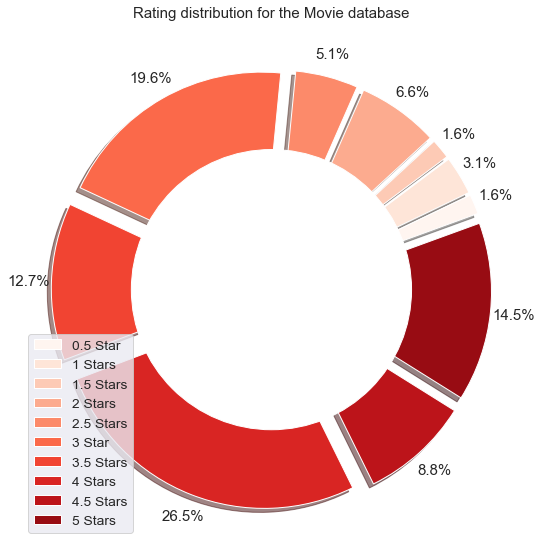

In [21]:
# Merge train with movies to join movie titles and ratings 
ratings = train_df.merge(movies_df, on='movieId', how='inner')
#ratings.drop('timestamp', axis=1, inplace=True)

# Count how many ratings are in each category (1 star, 2 star, ect)
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)
    
# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
   
# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Rating distribution for the Movie database\n', fontsize=15)
plt.tight_layout()
plt.show()

Most movies where scored with a rating of 4 stars with 26.6%<br><br>


**Q: Which users have rated the most movies?**

In [22]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        n (int): number of users to show
    Returns
    -------
        barplot (NoneType): barplot of top n users by number of observations
    Example
    -------
        >>> df = pd.DataFrame({'userId':[1,2,3,1,2,4,5,4]})
        >>> user_ratings_count(df, 3)
            NoneType (barplot)
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 34398 
Total number of movies:		 48213


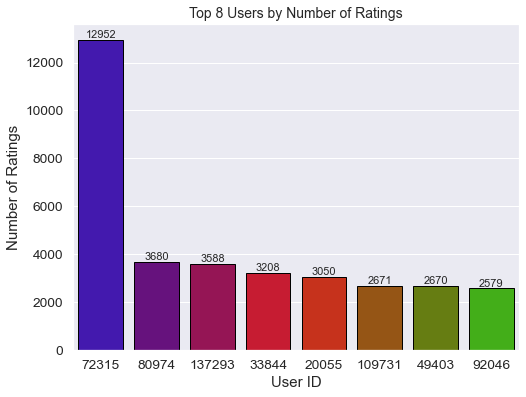

In [23]:
user_ratings_count(train_df,8)

Fig 1. User 72315 has rated an extreme number of movies relative to other users. For EDA purposes, this user is removed to make interpretation easier.

In [24]:
# Exclude user 72315 for EDA
eda_df = train_df[train_df['userId']!=72315]

Combined number of ratings:	 23734 
Total number of movies:		 45844


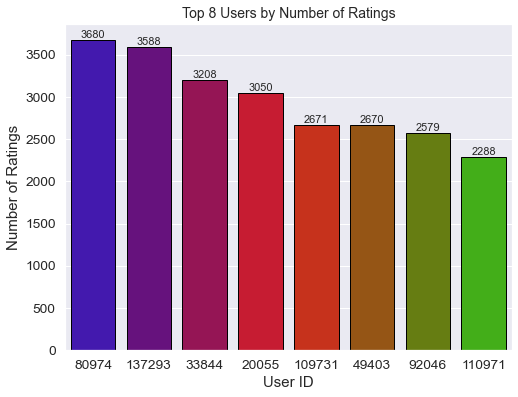

In [25]:
user_ratings_count(eda_df,8)

How many ratings have we lost?

In [42]:
# How many ratings have we lost?
34398-23734

10664

How many movies were only rated by our outlier?


In [43]:
# How many movies were only rated by our outlier?
48213-45844

2369

Our outlier user clearly rated quite a few movies. The loss of unique ratings indicates that he could've been the only person watching those movies. This would cause the recommender to use him as a baseline for those movies.

**Q: Is there a relationship between the number of movies a user has rated and the rating that they give?**

In [26]:
def mean_ratings_scatter(df, color='#4DA017', column='userId'):
    """
    Make scatterplots of mean ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        color (str): plot colour
        column (str): column to plot
    Returns
    -------
        scatterplot (NoneType): scatterplot of mean number of ratings
    """
    plt.figure(figsize=(6,4))
    mean_ratings = df.groupby(f'{column}')['rating'].mean()
    user_counts = df.groupby(f'{column}')['movieId'].count().values
    sns.scatterplot(x=mean_ratings, y = user_counts, color=color)
    plt.title(f'Mean Ratings by Number of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.show()

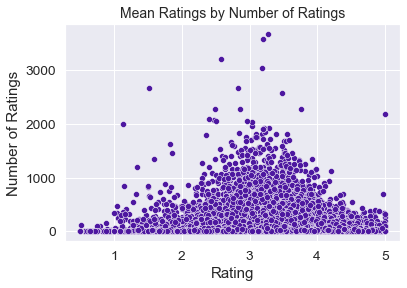

In [27]:
# Mean user ratings by number of ratings
mean_ratings_scatter(eda_df,'#4D17A0')

There doesn't seem to be a relationship, as the number of ratings and how a user rates a movie do not show any correlation.

**Q: Is there a relationship between the number of ratings a movie has and how highly it is rated?**

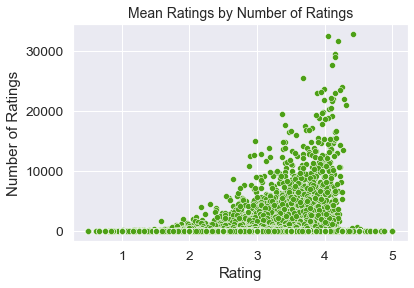

In [28]:
# Mean movie ratings by number of ratings
mean_ratings_scatter(eda_df, column='movieId')

This time we do see a relationship, The more ratings a movie has, the more highly it is likely to be rated. This confirms our intuitive understanding that the more highly rated a movie is, the more likely is that viewers will recommend the movie to each other. In other words, people generally try to avoid maing bad recommendations


### Genres

**Q: Which genres are the most commonly observed?**



In [29]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    ----------
        df (DataFrame): input DataFrame containing movie metadata
        column (str): target column to extract features from
    Returns
    -------
        
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


In [30]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='brg', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

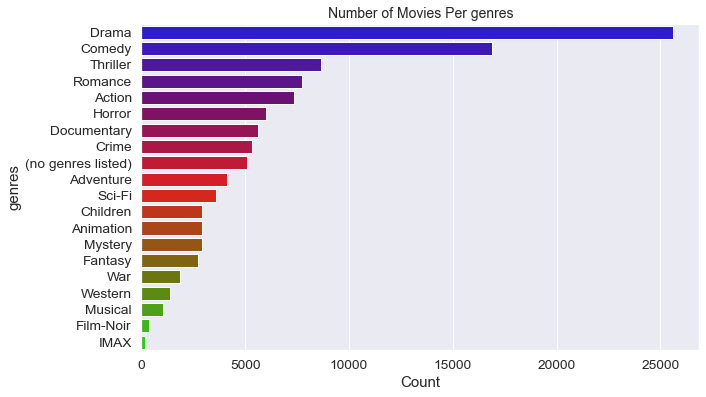

In [31]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Drama is the most frequently occuring genre in the database. Approximately 5000 movies have missing genres. We can use the IMDB and TMDB ID's together with the APIs to fill missing data. Further, IMAX is not a genre but rather a proprietary system for mass-viewings.

The above figure does not tell us anything about the popularity of the genres, lets check genre popularity

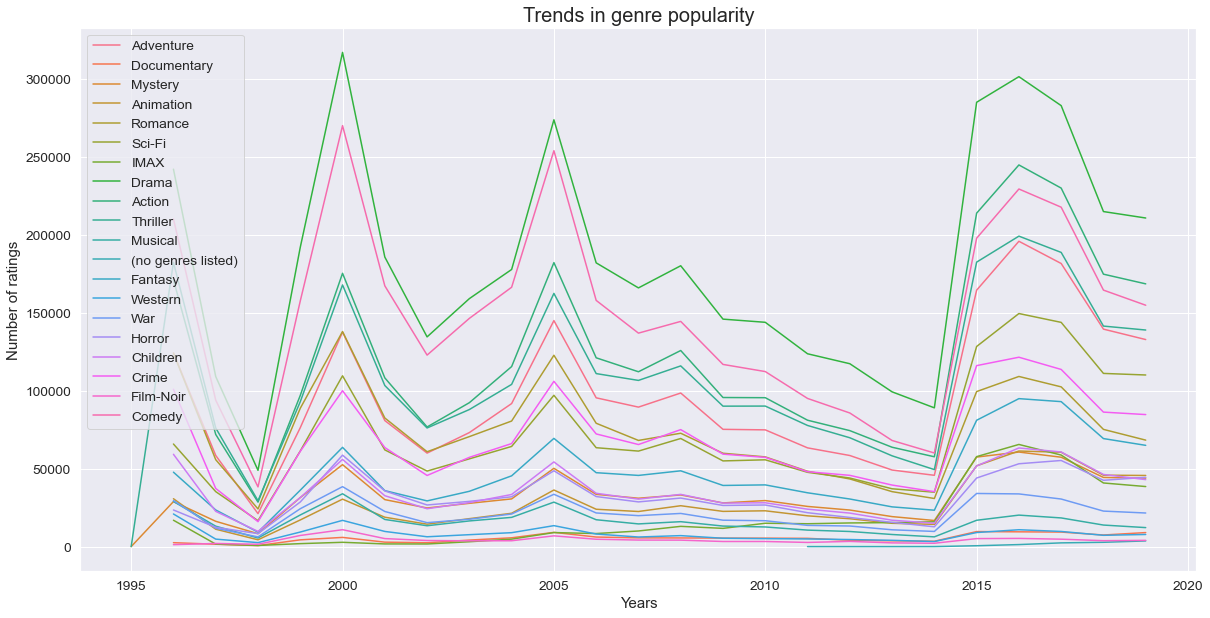

In [32]:
def most_watched(input_df):  
    """"
    This function creates a plot showing the popularity of each genre 
    over the last 50 years.
    
    Input: input_df
           datatype: DataFrame
           
    Output: None
    
    """   
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies_df,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(20,10))
    plot = sns.lineplot(data=b, dashes=False)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return

most_watched(train_df)

The top genres are Drama and Comedy. Movies however can have multiple genres

### **Year**

**Q: How many movies were realesed in each year?**

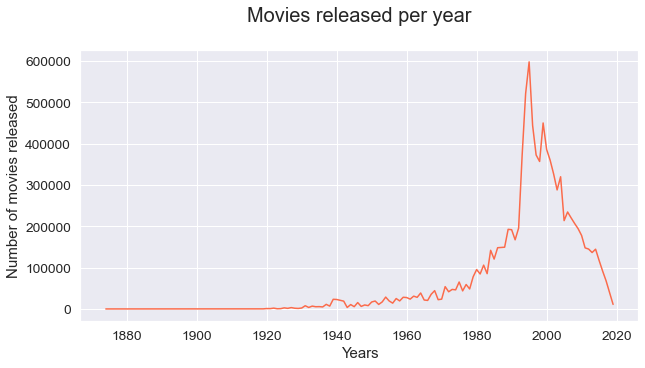

In [33]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds_r')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show() 

it is observed that more movies have been released as we progressed with in 20th century with biggest increase from the 1970s to the 1990s. This could be because the increase in technological advancements like the introduction of motion picture projectors and more people having access to the entertainment in theatres. .

### **Directors**


**Q: Who are the most common directors?**

In [51]:
def count_directors(df, count = 10):
    """
    Function to count the most common dircetors in a DataFrame:
    Parameters
    ----------
        df (DataFrame): input dataframe containing imdb metadata
        count (int): filter directors with fewer than count films
        
    Returns
    -------
        directors (DataFrame): output DataFrame
    Examples
    --------
        >>> df = pd.DataFrame({'imdbid':[0,1,2,3,4,5], 'director': [A,B,A,C,B]})
        >>> count_directors(df, count = 1)
            |index|director|count|
            |0|A|2|
            |1|B|2|
            |2|C|1|
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

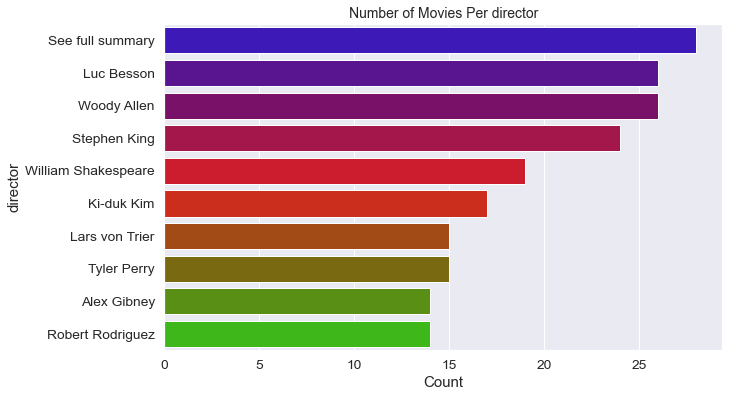

In [52]:
feature_count(directors.head(10), 'director')

The most common directors are Lus Besson, Woody Allen and Stephen King and Ki-duk Kim. "See full summary" is clearly not a director. William Shakespear and Stephen King are writers, not direcors. This is somehting to keep in mind when modelling. 

**wordcloud to show popular directors**

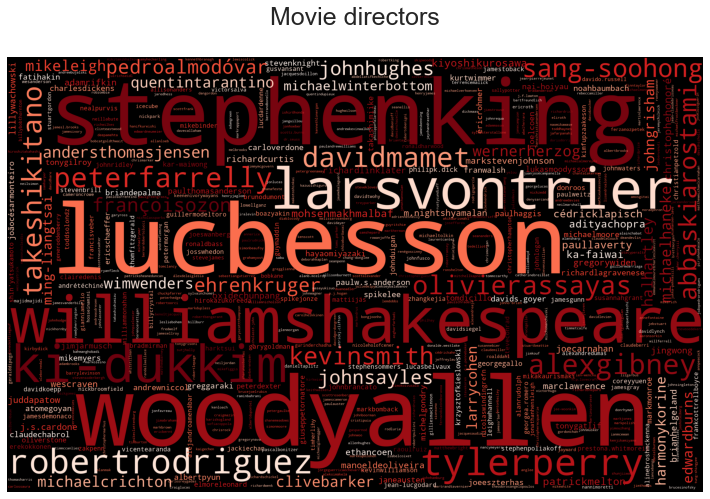

In [53]:
def wordcloud_generator(df, column):  
    """
    This function extracts all the unique keywords in a column
    and counts the number of times each keyword occurs in the column
    while ignoring words that are not meaningful.
    these keywords are then used to generate a word cloud 
    
    Input: df
           datatype: DataFrame
           column
           datatype: str
           
    Output: wordcloud
            Datatype: None
            
    """    
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud 

# Generate a WordCloud using the movie directors  
directors = wordcloud_generator(df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directors) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

Luc Paul Maurice Besson is a French film director, screenwriter, and producer. He directed or produced the films Subway, The Big Blue, and La Femme Nikita. Besson is associated with the Cinéma du look

### **Actors**

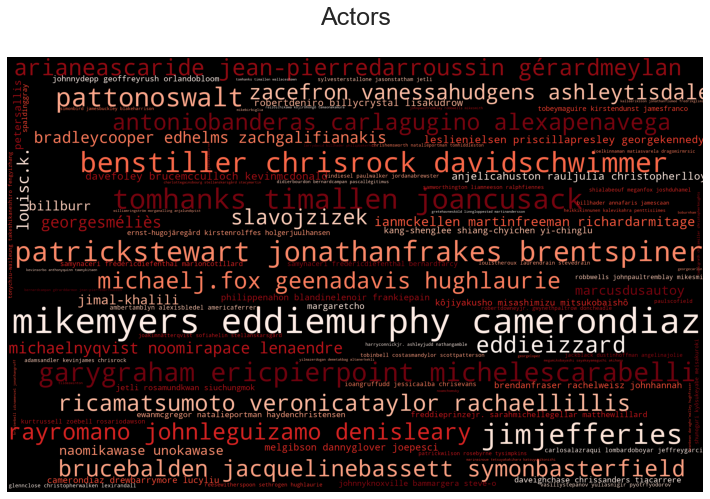

In [54]:
# Generate a wordcloud using the 2000 most frequently occuring actors' names in the dataset
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
actors = wordcloud_generator(df, 'title_cast')

# plot the WordCloud                        
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Actors\n', fontsize=25)
plt.show()

Lots of big Hoolywood actor names in here. Interrestly, Samual L Jackson doesn't feature promenetly on this wordcloud. Samuel L. Jackson is the most popular actor of all time, ever. According to a 2018 study published in Applied Network Science, using a wide range of metrics—including number of films, times appearing as top billing, and length of career—Jackson is peerless in the field

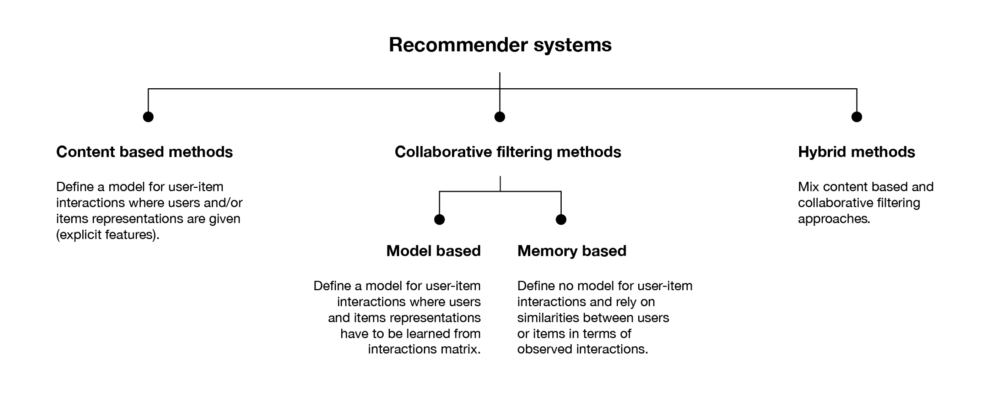

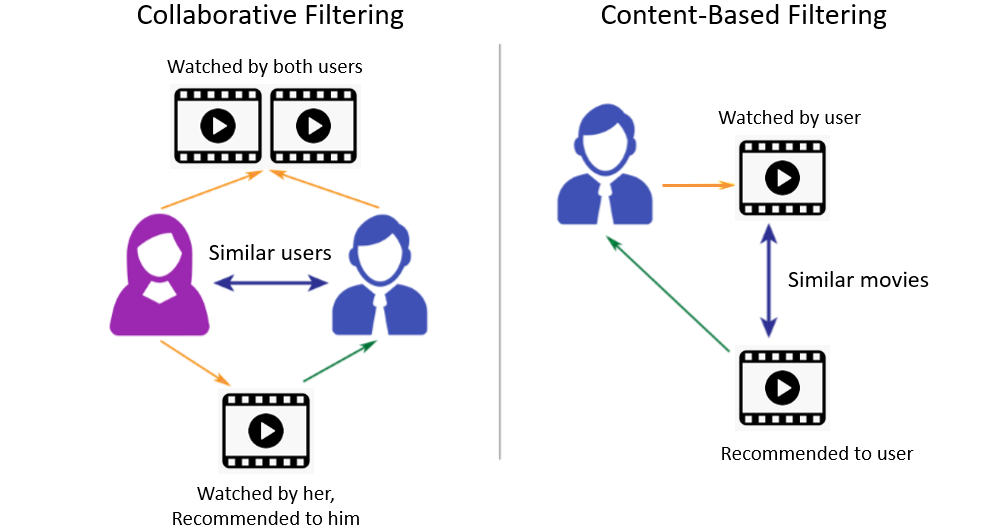

<p align="justify" > Recommendation engines are a subclass of machine learning which generally deal with ranking or rating products / users. Loosely defined, a recommender system is a system which predicts ratings a user might give to a specific item. These predictions will then be ranked and returned back to the user.



**We will implement a Content-based filtering and Collaborative filtering system in this project:**

## 8. Content Based Filtering

##### Item level data source 
— you need a strong source of data associated to the attributes of the item. The more information you know regarding the item, the more beneficial it will be for your system.

##### User level data source
— you need some sort of user feedback based on the item you’re providing recommendations for. This level of feedback can be either implicit or explicit.  The more user feedback you can track, the more beneficial it will be for your system.

**Creating the corpus for each movie**

We will be using the cast, director, plot keywords and genre as the metadata for our content based recommender system. These columns will be combined to form the corpus for each film which will then be used to determine the similarity between films.

In [55]:
# Creating an empty column and list to store the corpus for each movie
df['corpus'] = ''
corpus = []

# List of the columns we want to use to create our corpus 
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(df['movieId'])):
    words = ''
    for col in columns:
        words = words + df.iloc[i][col] + " "        
    corpus.append(words)

# Add the corpus information for each movie to the dataframe 
df['corpus'] = corpus
df.set_index('movieId', inplace=True)

# Drop the columns we don't need anymore to preserve memory
df.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

df.head()

,title,year,corpus
movieId,,,
1,Toy Story (1995),1995,tomhanks timallen donrickles johnlasseter toy ...
2,Jumanji (1995),1995,robinwilliams jonathanhyde kirstendunst jonath...
3,Grumpier Old Men (1995),1995,waltermatthau jacklemmon sophialoren marksteve...
4,Waiting to Exhale (1995),1995,whitneyhouston angelabassett lorettadevine ter...
5,Father of the Bride Part II (1995),1995,stevemartin dianekeaton martinshort alberthack...


**Count matrix**

We use countvectorizer to convert our corpus into a bag of words


In [56]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['corpus'])

**Cosine similarity matrix**

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [57]:
cos_sim = cosine_similarity(count_matrix, count_matrix)
print(cos_sim.shape)
cos_sim[:6]

(24866, 24866)


array([[1.        , 0.20044593, 0.15811388, ..., 0.06681531, 0.        ,
        0.15075567],
       [0.20044593, 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.16116459],
       [0.15811388, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05892557, 0.        , 0.1490712 , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.10540926, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Top-N Recommendations**

With our content similarity matrix computed, we're now ready to make some recommendations. We will begin by generating a top-N list of movies similar to one which we prompt the system with.

In [58]:
def get_topN_recommendations(title, n=10):
    """
    This function gets the top n recomended movies based on the 
    title of the movie input by the user 
    
    Input: title
           Datatype: str
           
           n (default = 10)
           Datatype: int
    """ 
    # Create a a copy of the input dataframe where the index has been reset
    df1 = df.reset_index()
    
    # Extract the movie titles
    titles = df1['title']
    indices = pd.Series(df1.index, index=df['title'])
    idx = indices[title]
    
    # Get the similarity scores of the top n movies most similar to the user input
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n]
    
    # Exctract the titles of the top n most similar movies  
    movie_indices = [i[0] for i in sim_scores]
    
    return titles.iloc[movie_indices]

get_topN_recommendations('Ice Age (2002)').head(10)

10648           Ice Age 2: The Meltdown (2006)
18129      Ice Age 4: Continental Drift (2012)
13437    Ice Age: Dawn of the Dinosaurs (2009)
16662                   Winnie the Pooh (2011)
23854     A Flintstones Christmas Carol (1994)
151                      Batman Forever (1995)
9591             Pooh's Heffalump Movie (2005)
4873         Bill & Ted's Bogus Journey (1991)
7038                          Peter Pan (2003)
Name: title, dtype: object

So because you liked ice age the above are the top 10 movies recommended to you,conviniently starting with the Ice age sequel.

## 9. Collaborative Filtering

<p align="justify" > Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions. We shall be applying collaborative based filtering on the testing set and make our submission to the Kaggle competition with it.

<p align="justify" > In our modelling we're going to use the surprise package. Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. The name SurPRISE stands for Simple Python RecommendatIon System Engine.

<p align="justify" > Surprise allows us to use a built-in datasets, Movielens. We'll use this data to run experiments on with different models before we decide on a model and use it on our own data.

<p align="justify" > The MovieLends dataset is with a smaller dataset than ours, making it easy to implement new algorithm ideas.

We'll use the Train-test split and the fit() method to get the RMSE for each algorithm.

### Model 1 - Surprise MovieLens run with Singular value decomposition - SVD 


Singular value decomposition (SVD) is a matrix factorization method that generalizes the eigendecomposition of a square matrix (n x n) to any matrix (n x m)

SVD is similar to Principal Component Analysis (PCA), but more general.


In [59]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

#time the experiment
start = timeit.default_timer()

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
SVD_RMSE = accuracy.rmse(predictions)
print('SVD_RMSE = ' + str(SVD_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_SVD = round((stop - start), 2)
print("Program Executed in "+str(execution_time_SVD) + " seconds") # It returns time in seconds

RMSE: 0.9366
SVD_RMSE = 0.9365556905159111
Program Executed in 3.41 seconds


### Model 2 - Surprise MovieLens run with SVD++

The SVD++ algorithm, an extension of SVD taking into account implicit ratings.

In [60]:
from surprise import SVDpp

#time the experiment
start = timeit.default_timer()

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD++ algorithm here
algo = SVDpp()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
SVDpp_RMSE = accuracy.rmse(predictions)
print('SVDpp_RMSE = ' + str(SVDpp_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_SVDpp = stop - start
print("Program Executed in "+str(execution_time_SVDpp) + " seconds") # It returns time in seconds

RMSE: 0.9223
SVDpp_RMSE = 0.92230411808395
Program Executed in 106.49358260000002 seconds


### Model 3 - Surprise MovieLens run with Non-negative matrix factorization - NMF
Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements.

In [61]:
from surprise import NMF

#time the experiment
start = timeit.default_timer()

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD++ algorithm here
algo = NMF()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
NMF_RMSE = accuracy.rmse(predictions)
print('NMF_RMSE = ' + str(NMF_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_NMF = stop - start
print("Program Executed in "+str(execution_time_NMF) + " seconds") # It returns time in seconds

RMSE: 0.9700
NMF_RMSE = 0.9700313638092969
Program Executed in 3.318349899999987 seconds


### Model 4 - Surprise MovieLens run with Slope One

Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms

In [62]:
from surprise import SlopeOne

#time the experiment
start = timeit.default_timer()

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD++ algorithm here
algo = SlopeOne()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
SlopeOne_RMSE = accuracy.rmse(predictions)
print('SlopeOne_RMSE = ' + str(SlopeOne_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_SlopeOne = stop - start
print("Program Executed in "+str(execution_time_SlopeOne) + " seconds") # It returns time in seconds

RMSE: 0.9474
SlopeOne_RMSE = 0.947407077052609
Program Executed in 2.0822886999999923 seconds


### Model 5 - Surprise MovieLens run with k-NN

In [63]:
from surprise import KNNBasic

#time the experiment
start = timeit.default_timer()

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD++ algorithm here
algo = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
KNN_RMSE = accuracy.rmse(predictions)
print('KNN_RMSE = ' + str(KNN_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_KNN = stop - start
print("Program Executed in "+str(execution_time_KNN) + " seconds") # It returns time in seconds

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9813
KNN_RMSE = 0.9812980976562787
Program Executed in 2.695188700000017 seconds


Lets graph the RMSE results for each algorith experiment. 

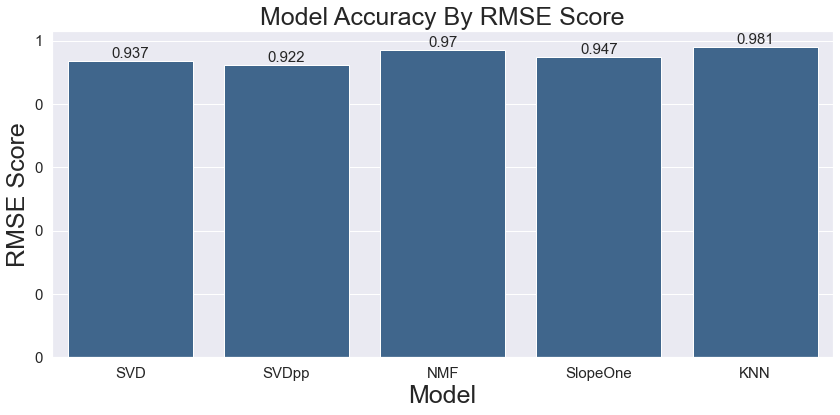

In [64]:
# Create dataframe for RMSE data 
rmse_scores =[SVD_RMSE,SVDpp_RMSE,NMF_RMSE,SlopeOne_RMSE,KNN_RMSE]
models =['SVD','SVDpp','NMF','SlopeOne','KNN']
accuracy_data = pd.DataFrame({'model':models,'RMSE':rmse_scores})

#Plot the RMSE data
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(data=accuracy_data, x='model', y='RMSE', color=(0.2, 0.4, 0.6, 0.6), ax=ax)
ax.set_xlabel("Model", size=25)
ax.set_ylabel('RMSE Score', size=25)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(size = 15)
plt.yticks(size = 15)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=15, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=25)
plt.show()

What were the excecution times?

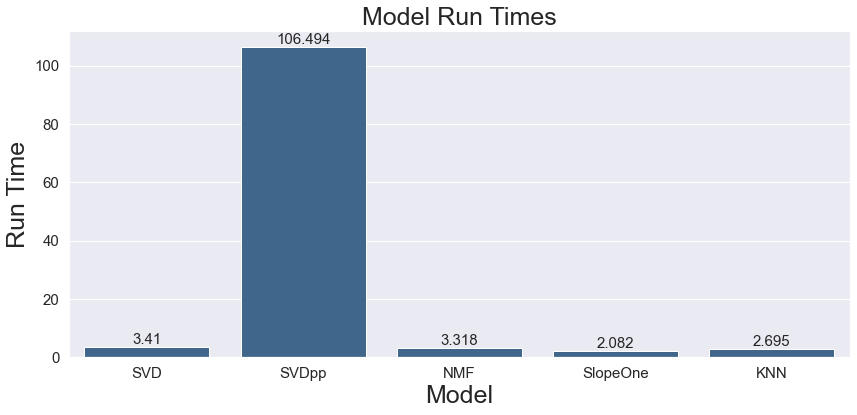

In [65]:
# Create dataframe for run time data 
models =['SVD','SVDpp','NMF','SlopeOne','KNN']
run_times =[execution_time_SVD,execution_time_SVDpp,execution_time_NMF,execution_time_SlopeOne,execution_time_KNN]
time_data = pd.DataFrame({'model':models,'Time':run_times})

#Plot the run time data
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(data=time_data, x='model', y='Time', color=(0.2, 0.4, 0.6, 0.6), ax=ax)
ax.set_xlabel("Model", size=25)
ax.set_ylabel('Run Time', size=25)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(size = 15)
plt.yticks(size = 15)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=15, ha="center", va='bottom')
plt.title('Model Run Times', fontsize=25)
plt.show()

#### **Model Comparison based on RMSE**

The best performing model in this study was the SVD++ model. It runs for much longer than the othre models, almost 6 times longer comparatively. The SVD++ model is closely rivaled by the SVD model, which has a quicker exceution time. We'll select this model to fit onto our own data.  

## Apply SVD to our own data

We require a Reader object, but only the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order (which we will specify below). Each row thus corresponds to a given rating.

In [66]:
# Run on the subset of the train data to illustrate the model performance 
train_df = pd.read_csv('train.csv')

model_testing_df = train_df.sample(500000)

Set up the reader

In [67]:
# from surprise import SVD
# from surprise import Dataset
# from surprise.model_selection import cross_validate

#our training data
df = pd.DataFrame(model_testing_df)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

#### Hyperparameter tuning - SVD on training dataset - 10 million 

In [68]:
# Don't rerun this cell as it takes hours to complete. 
#We have the paramenters for the SVD model already from running the tuning before

# from surprise.model_selection import GridSearchCV
# from surprise import dataset

# param_grid = {'n_epochs':[30,40,50], 
#               'n_factors':[200,300,400], 
#               'init_std_dev':[0.001, 0.005, 0.05, 0.1], 
#               'random_state':[42]} 
# grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1, joblib_verbose=10)
# grid_SVD.fit(data)
# print('Best Score is: ')
# print(grid_SVD.best_score['rmse'])
# print('Best Parameters are: ')
# print(grid_SVD.best_params['rmse'])

Train the algorithm after having prepared the dataset

In [69]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

Train/test split and see what the RMSE metric is, before we determine the ratings of the users in the test set with our model trained on all the data

In [70]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9336


0.9336424830869577

## 10. Data engineering - Trim data

After our EDA discovery of an outlier in the Users data, we remove that user and rerun the SVD model to see if we can improve on the RMSE 


In [71]:
train_df = pd.read_csv('./train.csv')

# remove outlier in userID in train_df
display(train_df.info())
display(train_df.head(3))

train_df.drop(train_df.index[train_df['userId'] == 72315], inplace=True)

train_df = train_df.reset_index(drop=True)

#use a subset of the train data to illustrate the model performance 
model_testing_df = train_df.sample(500000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


Set up the reader

In [72]:
# from surprise import SVD
# from surprise import Dataset
# from surprise.model_selection import cross_validate

#our training data
df = pd.DataFrame(model_testing_df)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

Hyperparameter tune

In [74]:
# Don't rerun this cell as it takes hours to complete. 
#We have the paramenters for the SVD model already from running the tuning before

# from surprise.model_selection import GridSearchCV
# from surprise import dataset

# param_grid = {'n_epochs':[30,40,50], 
#               'n_factors':[200,300,400], 
#               'init_std_dev':[0.001, 0.005, 0.05, 0.1], 
#               'random_state':[42]} 
# grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1, joblib_verbose=10)
# grid_SVD.fit(data)
# print('Best Score is: ')
# print(grid_SVD.best_score['rmse'])
# print('Best Parameters are: ')
# print(grid_SVD.best_params['rmse'])

Train model on trimmed data

In [75]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

Estimate RMSE against test data with new trim data SVD algo 

In [76]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9309


0.9309444765578417

### Comet experiment end

In [77]:
experiment.log_parameters({"model_type": "SVD"})
experiment.log_metrics({"RMSE": accuracy.rmse(predictions)})
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/drikus-d/recommender/3608e954f18b456f89b8dd19ba9781d5
COMET INFO:   Metrics:
COMET INFO:     RMSE : 0.9309444765578417
COMET INFO:   Parameters:
COMET INFO:     model_type : SVD
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------


RMSE: 0.9309


COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: All files uploaded, waiting for confirmation they have been all received


<p align="justify" > Based on the results of the RMSE, 

## 11. The Chosen Model Summary and Conclusion

Our SVD model trained on all the training data had an RMSE of 0.8395, and after hyperparameter tuning this score improved to 0.7963. This gave us the lead on Kaggle with the highest score. We did not rerun this experiment for the final notebook as the hyperparameter tuning and model excecution times equal roughly a day and there wasn't time to replicate the result. 

After trimming the datan the RMSE marginally improved to 0.7832 which validates our conclusion that the User outlier was anomalous. We get an improved model performance with the outlier removed.

For the purposed of the submission Notebook, the SVD model was only applied to a 500 000 sample of the test data. The RMSE score for this test was 0.9336 and after the data trimming the RMSE improved to 0.9309

## 12. Submission

Prep our test dataframe for the the surprise package, as it requires User, Item and a rating column

In [ ]:
test_df = pd.read_csv('test.csv')

test_df.loc[:, 'rating'] = 0


#using load_from_df surprise function to load dataset for predictions
test_processed = Dataset.load_from_df(test_df[['userId','movieId','rating']], reader)

#Train test split, test size will be equal to 1.
NA, test = train_test_split(test_processed, test_size=1.0, shuffle = False, random_state = 42)

#Prediction 
predictions = algo.test(test)

#saving the predictions as a list to add as a column for our Kaggle submission
ratings = [i.est for i in predictions]
ratings

Create a new dataframe with the ratings included and combining the userId and movieId into one column.

In [ ]:
display(sample_submission_df.head())
test_df['Id'] = test_df['userId'].astype(str)  + '_'+ test_df['movieId'].astype(str) 
test_df
#change rating column
test_df['rating'] = ratings
del test_df['userId']
del test_df['movieId']
display(test_df)

In [ ]:
test_df['R'] = test_df['rating']
del test_df['rating']
test_df['rating'] = test_df['R']
del test_df['R']
test_df

In [ ]:
test_df.to_csv('Kaggle_submission_SVD_HPT.csv', index = False)

## 13. Pickle file generation 

Prep smaller subset of the data for pickle submission 

In [79]:
# We subset the data here for the pickle, using just 10 000 rows
train_df = pd.read_csv('train.csv')
model_testing_df = train_df.sample(10000)

Set up the reader

In [80]:
#our training data
df = pd.DataFrame(model_testing_df)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

Train the algorithm after having prepared the dataset

In [81]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

Train/test split and see what the RMSE metric is, before we determine the ratings of the users in the test set with our model trained on all the data

In [82]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0141


1.0140713026203605

Smaller subset of the data was used in order to scale down the size of the pickle file. The results for the model trained on just 10000 rows of the test data (hyper parameter tuned) produced an RMSE of 1.0093 when measured on the test data. 

In [ ]:
pickle.dump(algo, open("./SVD_model_10000.pkl",'wb'))